In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load the dataset
file_path = 'CC GENERAL.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 2: Preprocessing the data
numeric_columns = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=numeric_columns)

In [4]:
# Step 3: Apply K-Medoids clustering
def apply_k_medoids(data, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=42)
    labels = kmedoids.fit_predict(data)
    return labels, kmedoids.medoid_indices_

# Apply K-Medoids with k=2 and k=5
kmedoids_labels_k2, medoids_k2 = apply_k_medoids(data_scaled, 2)
kmedoids_labels_k5, medoids_k5 = apply_k_medoids(data_scaled, 5)

In [5]:
# Step 4: Apply Hierarchical clustering
def apply_hierarchical_clustering(data, n_clusters, method='ward'):
    Z = linkage(data, method=method)
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    return labels, Z

# Apply Hierarchical clustering with k=2 and k=5
hierarchical_labels_k2, Z_k2 = apply_hierarchical_clustering(data_scaled, 2)
hierarchical_labels_k5, Z_k5 = apply_hierarchical_clustering(data_scaled, 5)

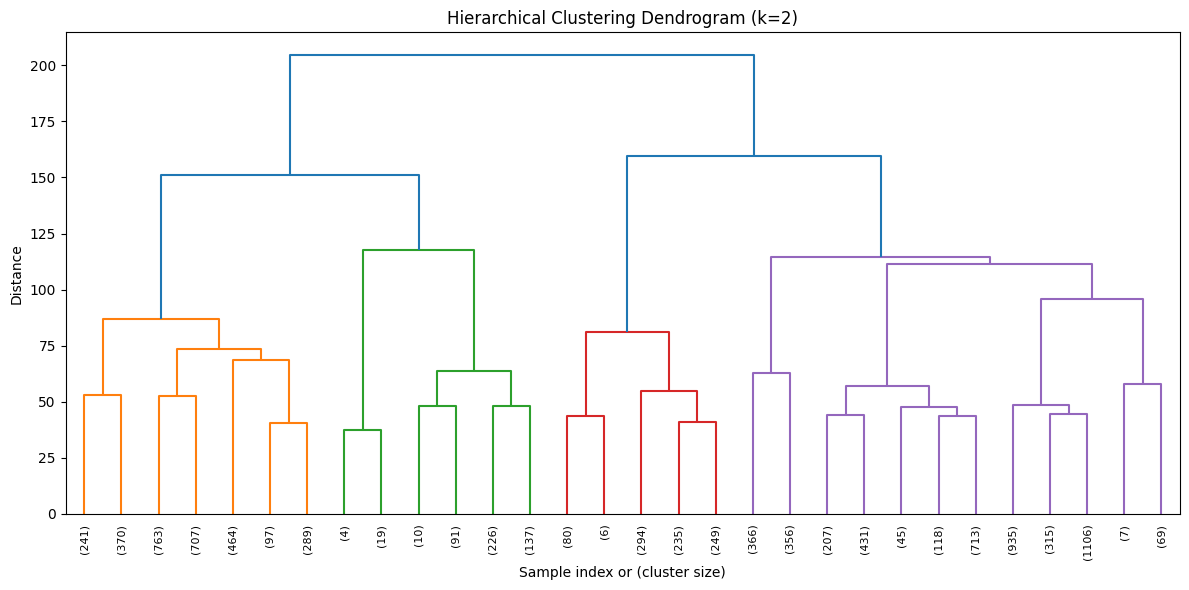

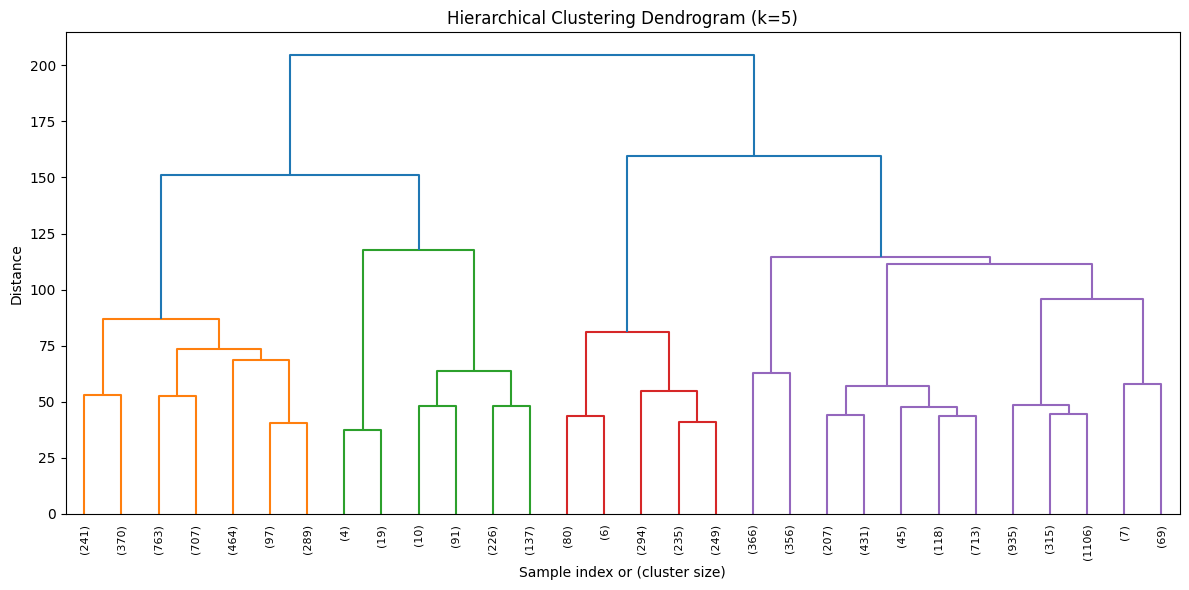

In [7]:
# Step 5: Visualize the hierarchical clustering dendrogram
def plot_dendrogram(Z, title):
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=8.)
    plt.title(title)
    plt.xlabel('Sample index or (cluster size)')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

# Plot dendrograms
plot_dendrogram(Z_k2, 'Hierarchical Clustering Dendrogram (k=2)')
plot_dendrogram(Z_k5, 'Hierarchical Clustering Dendrogram (k=5)')

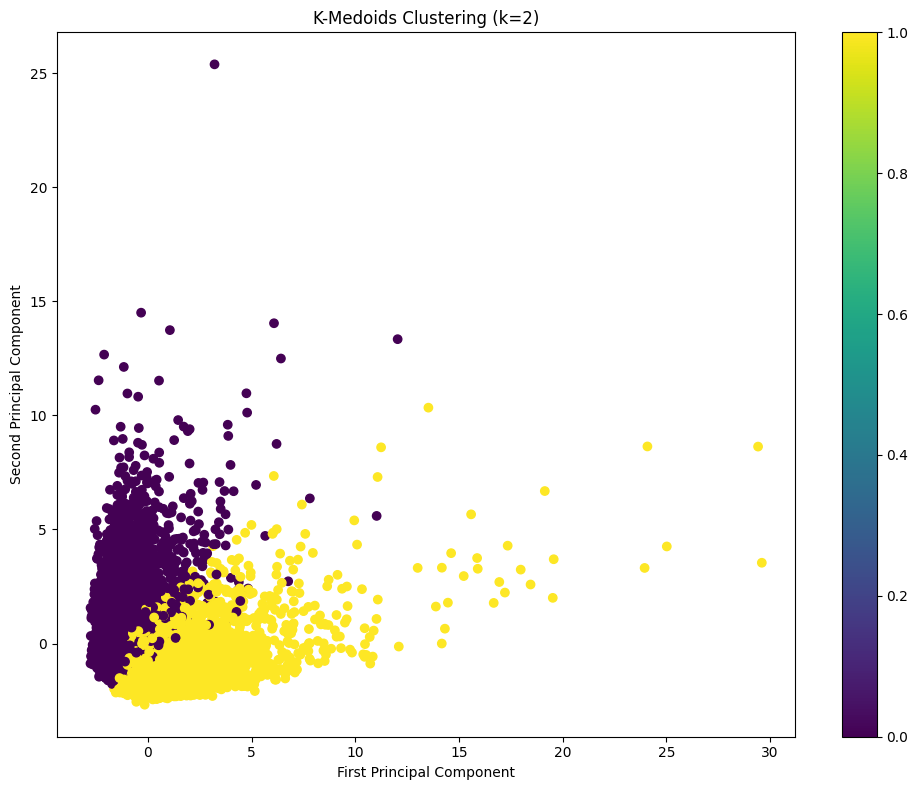

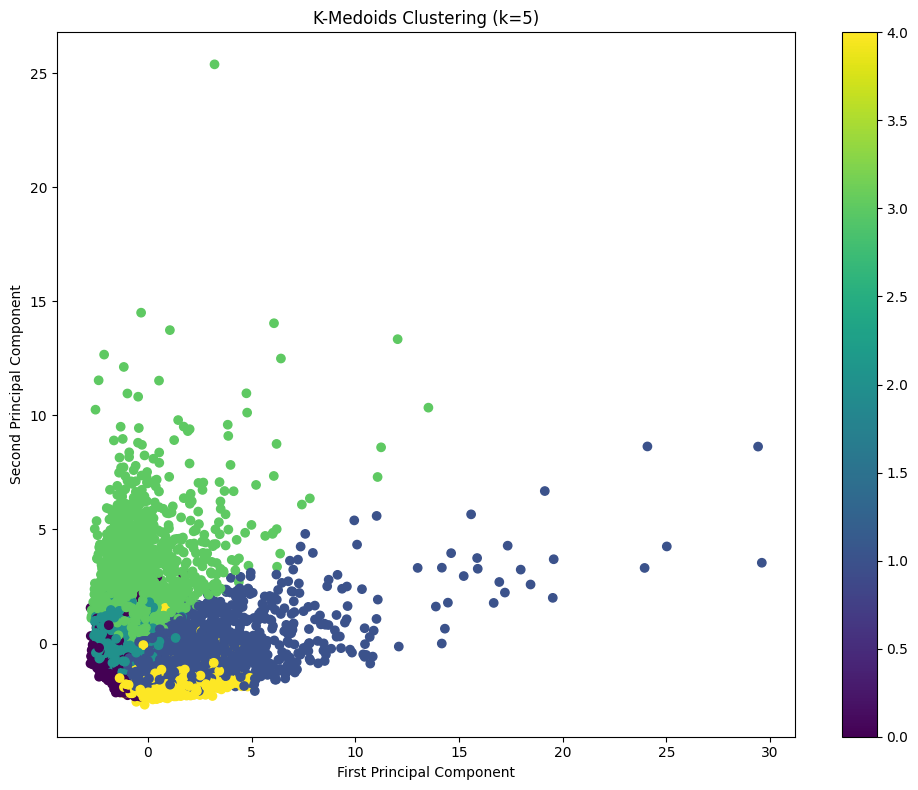

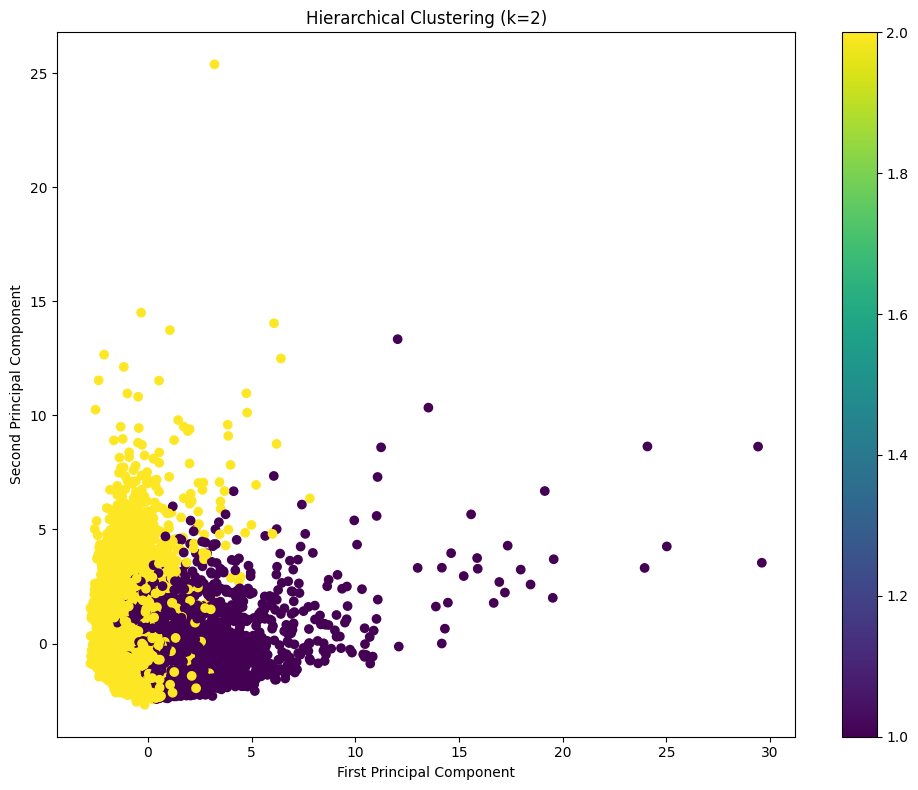

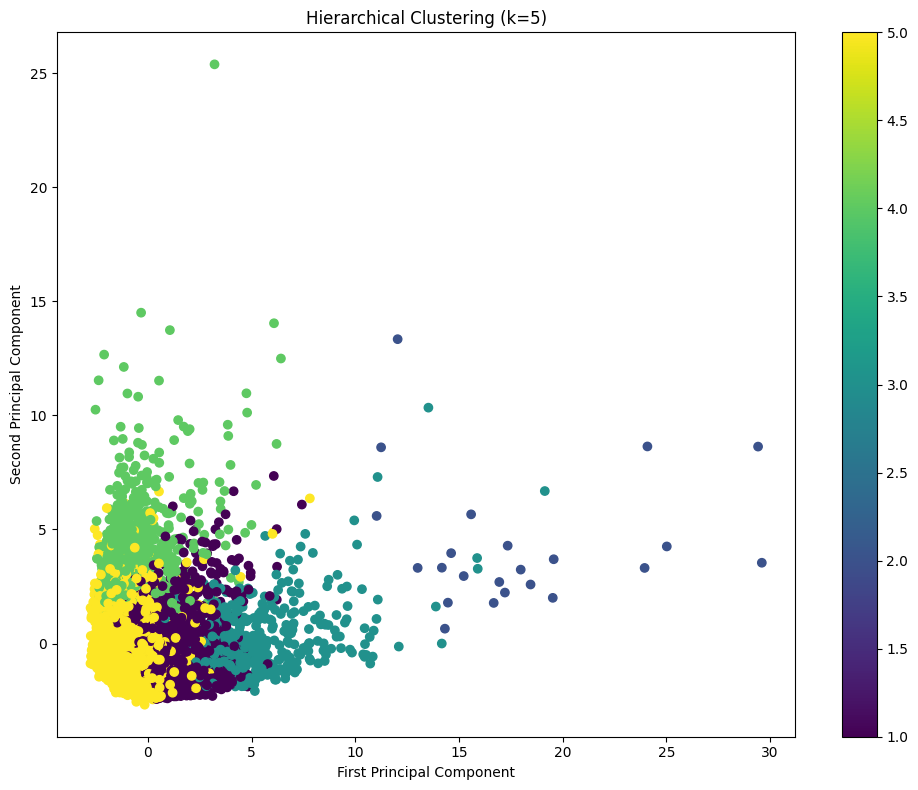

In [8]:
# Step 6: Visualize clusters using PCA
def plot_clusters_2d(data, labels, title):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.tight_layout()
    plt.show()

# Plot clusters
plot_clusters_2d(data_scaled, kmedoids_labels_k2, 'K-Medoids Clustering (k=2)')
plot_clusters_2d(data_scaled, kmedoids_labels_k5, 'K-Medoids Clustering (k=5)')
plot_clusters_2d(data_scaled, hierarchical_labels_k2, 'Hierarchical Clustering (k=2)')
plot_clusters_2d(data_scaled, hierarchical_labels_k5, 'Hierarchical Clustering (k=5)')

In [11]:
# Step 7: Add labels to the data and show clusters for k=2 and k=5
data_clustered_k2 = data_scaled.copy()
data_clustered_k2['KMedoids_Cluster'] = kmedoids_labels_k2
data_clustered_k2['Hierarchical_Cluster'] = hierarchical_labels_k2

data_clustered_k5 = data_scaled.copy()
data_clustered_k5['KMedoids_Cluster'] = kmedoids_labels_k5
data_clustered_k5['Hierarchical_Cluster'] = hierarchical_labels_k5

In [12]:
# Display the first few rows of clustered data for k=2 and k=5
print("Clustered Data (K=2)")
print(data_clustered_k2.head())

Clustered Data (K=2)
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2             

In [13]:
print("\nClustered Data (K=5)")
print(data_clustered_k5.head())


Clustered Data (K=5)
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2            